In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.weightstats import DescrStatsW
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.0.1
numpy==1.18.1
seaborn==0.10.1


In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/data1/home/quanngu/anaconda3/bin/python
3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


In [ ]:
# transfer = pd.read_csv("/data0/power/LARC_20210209_STDNT_TERM_TRNSFR_INFO.csv")
# transfer.columns

# Files
"/data0/power/LARC_20210209_STDNT_INFO.csv"  
"/data0/power/LARC_20210209_STDNT_TERM_CLASS_INFO.csv"  
"/data0/power/LARC_20210209_STDNT_TERM_INFO.csv"  
"/data0/power/LARC_20210209_STDNT_TERM_TRNSFR_INFO.csv"

# Import selected features from LARC_20210209_STDNT_TERM_INFO.csv

In [182]:
fields2 = [ 'CUM_GPA', 
           'CURR_GPA', 
            'TERM_CD',
            'TERM_SHORT_DES',  
            'ACAD_LVL_BOT_SHORT_DES',
            'STDNT_ID'
          ]

stdnt_term_info = pd.read_csv("/data0/power/LARC_20210209_STDNT_TERM_INFO.csv", usecols=fields2)

In [4]:
stdnt_term_info

,STDNT_ID,TERM_CD,TERM_SHORT_DES,ACAD_LVL_BOT_SHORT_DES,CURR_GPA,CUM_GPA
0,1,1560,FA 2005,PSpec/NCFD,0.0,0.0
1,2,2110,FA 2016,Junior,4.0,4.0
2,2,2120,WN 2017,Senior,4.0,4.0
3,2,2160,FA 2017,Senior,4.0,4.0
4,2,2170,WN 2018,Senior,4.0,4.0
...,...,...,...,...,...,...
2802688,382310,2310,FA 2020,FPSpc/NCFD,4.0,4.0
2802689,382580,2310,FA 2020,FPSpc/NCFD,0.0,0.0
2802690,382581,2310,FA 2020,FPSpc/NCFD,4.0,4.0
2802691,382863,2310,FA 2020,FPSpc/NCFD,0.0,0.0


**Filter Freshman in Fall 2016**

In [183]:
stdnt_term_info['term'] = stdnt_term_info['TERM_SHORT_DES'].astype(str).str[:2]
stdnt_term_info['year'] = stdnt_term_info['TERM_SHORT_DES'].astype(str).str[3:7].astype(int)
stdnt_term_info

,STDNT_ID,TERM_CD,TERM_SHORT_DES,ACAD_LVL_BOT_SHORT_DES,CURR_GPA,CUM_GPA,term,year
0,1,1560,FA 2005,PSpec/NCFD,0.0,0.0,FA,2005
1,2,2110,FA 2016,Junior,4.0,4.0,FA,2016
2,2,2120,WN 2017,Senior,4.0,4.0,WN,2017
3,2,2160,FA 2017,Senior,4.0,4.0,FA,2017
4,2,2170,WN 2018,Senior,4.0,4.0,WN,2018
...,...,...,...,...,...,...,...,...
2802688,382310,2310,FA 2020,FPSpc/NCFD,4.0,4.0,FA,2020
2802689,382580,2310,FA 2020,FPSpc/NCFD,0.0,0.0,FA,2020
2802690,382581,2310,FA 2020,FPSpc/NCFD,4.0,4.0,FA,2020
2802691,382863,2310,FA 2020,FPSpc/NCFD,0.0,0.0,FA,2020


In [177]:
import click

@click.command()
@click.option('--year_from', default=2012, help='Filter data from this year')
@click.option('--year_to', default=2016, help='Filter data until this year')



SyntaxError: unexpected EOF while parsing (<ipython-input-177-fb887dddb6b9>, line 5)

In [186]:
def retention(year_from,year_to):
    fields2 = [ 'CUM_GPA', 
           'CURR_GPA', 
            'TERM_CD',
            'TERM_SHORT_DES',  
            'ACAD_LVL_BOT_SHORT_DES',
            'STDNT_ID'
          ]

    stdnt_term_info = pd.read_csv("/data0/power/LARC_20210209_STDNT_TERM_INFO.csv", usecols=fields2)
    stdnt_term_info['term'] = stdnt_term_info['TERM_SHORT_DES'].astype(str).str[:2]
    stdnt_term_info['year'] = stdnt_term_info['TERM_SHORT_DES'].astype(str).str[3:7].astype(int)
    
    term = "FA"
    cohort = "Freshman"

    month = None
    if term == "FA":
        month == 9
    elif term == "WN":
        month == 1
    else:
        month == 5

    list_retention = stdnt_term_info.copy().loc[(stdnt_term_info['year'].between(year_from+1,year_to+1) &
                                        (stdnt_term_info['term'] == term)),['STDNT_ID', 'year']]

    list_retention['year'] = list_retention['year'] - 1
    list_retention['next_year'] = list_retention['year']+1
    
    stdnt_term_info = stdnt_term_info.loc[(stdnt_term_info['year'].between(year_from,year_to) &
                                        (stdnt_term_info['term'] == term) & 
                                        (stdnt_term_info['ACAD_LVL_BOT_SHORT_DES'] == cohort)),]

    stdnt_term_info['next_year'] = stdnt_term_info['year']+1

    list_retention = stdnt_term_info.loc[:,['STDNT_ID','year','next_year']].merge(list_retention,how='inner',on=['STDNT_ID','year','next_year'])


In [187]:
retention(2012,2013)

# Import selected features from LARC_20210209_STDNT_INFO.csv

In [82]:
fields1 = ['STDNT_ID',
        'UM_DGR_1_MAJOR_1_CIP_CD',  
        'UM_DGR_1_MAJOR_2_CIP_CD',
        'UM_DGR_1_MINOR_1_CIP_CD',
        'UM_DGR_1_MINOR_2_CIP_CD' , 
        'MAX_ACT_ENGL_SCR',
        'MAX_ACT_MATH_SCR',
        'STDNT_BIRTH_YR',
        'STDNT_BIRTH_MO',
        'STDNT_ETHNC_GRP_SHORT_DES',  
        'STDNT_SEX_SHORT_DES',  
        'HS_GPA',
        'MAX_SATI_MATH_SCR',
        'MAX_SATI_VERB_SCR',
        'STDNT_DMSTC_UNDREP_MNRTY_DES']



stdnt_info = pd.read_csv("/data0/power/LARC_20210209_STDNT_INFO.csv", usecols=fields1)

# rename columns
stdnt_info = stdnt_info.rename(columns={'STDNT_SEX_SHORT_DES':'sex',
                                        'STDNT_ETHNC_GRP_SHORT_DES': 'ethnicity',
                                        'HS_GPA': 'gpa_high_school',
                                        'STDNT_DMSTC_UNDREP_MNRTY_DES': 'urm_status',
                                        'UM_DGR_1_MAJOR_1_CIP_CD': 'cip6_major_1',
                                        'UM_DGR_1_MAJOR_2_CIP_CD': 'cip6_major_2',
                                        'UM_DGR_1_MINOR_1_CIP_CD': 'cip6_minor_1',
                                        'UM_DGR_1_MINOR_2_CIP_CD': 'cip6_minor_2',
                                        'MAX_ACT_ENGL_SCR': 'act_english',
                                        'MAX_ACT_MATH_SCR': 'act_math',
                                        'MAX_SATI_MATH_SCR': 'sat_math',
                                        'MAX_SATI_VERB_SCR': 'sat_verbal'})

# change column type

# compute age from birth year & month in Fall 2016 (assume starting in september)

stdnt_info = stdnt_info.merge(stdnt_term_info.loc[:,['STDNT_ID','year']],on='STDNT_ID')
stdnt_info['age'] = stdnt_info['year']-stdnt_info['STDNT_BIRTH_YR']
stdnt_info['age'] = np.where(stdnt_info['STDNT_BIRTH_MO'] > month, stdnt_info['age'],stdnt_info['age']+1)
stdnt_info = stdnt_info.drop(['STDNT_BIRTH_YR','STDNT_BIRTH_MO'],axis=1)
stdnt_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27250 entries, 0 to 27249
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STDNT_ID         27250 non-null  int64  
 1   sex              27250 non-null  object 
 2   ethnicity        27250 non-null  object 
 3   urm_status       27250 non-null  object 
 4   gpa_high_school  27068 non-null  float64
 5   act_english      22312 non-null  float64
 6   act_math         22312 non-null  float64
 7   sat_math         7865 non-null   float64
 8   sat_verbal       7865 non-null   float64
 9   cip6_major_1     24591 non-null  float64
 10  cip6_major_2     2875 non-null   float64
 11  cip6_minor_1     8455 non-null   float64
 12  cip6_minor_2     711 non-null    float64
 13  year             27250 non-null  int64  
 14  age              27250 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 3.3+ MB


In [144]:
stdnt_info['sex'].value_counts()
stdnt_info = stdnt_info.replace({"Unknown": np.NaN})
stdnt_info['sex'].value_counts()

Female    14564
Male      12685
Name: sex, dtype: int64

# Import selected features from LARC_20210209_STDNT_TERM_CLASS_INFO.csv

In [84]:
fields3 = [ 'STDNT_ID',
            'CRSE_CMPNT_CD',
           'CRSE_CMPNT_SHORT_DES',
           'CRSE_CIP_CD', 
            'CRSE_GRD_OFFCL_CD',
           'GRD_PNTS_PER_UNIT_NBR',
            'INSTRN_MODE_SHORT_DES', 
            'UNITS_TAKEN_NBR',  
            'CRSE_ID_CD',
            'GRD_BASIS_ENRL_CD',
            'TERM_SHORT_DES']
stdnt_term_class_info = pd.read_csv("/data0/power/LARC_20210209_STDNT_TERM_CLASS_INFO.csv", usecols=fields3)
stdnt_term_class_info = stdnt_term_class_info.rename(columns={'INSTRN_MODE_SHORT_DES':'modality'})

/data1/home/quanngu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
# Filter term & freshman by merging with stdnt_term_info
stdnt_term_class_info = pd.merge(stdnt_term_class_info,stdnt_term_info[['STDNT_ID','TERM_SHORT_DES']],
                                  on=['STDNT_ID','TERM_SHORT_DES'])
stdnt_term_class_info = stdnt_term_class_info.replace({"In Person": "inperson", 
                                                        "Distance": "online", 
                                                        "WWW": "online", 
                                                        "Hybrid" : "online"})

stdnt_term_class_info

,STDNT_ID,TERM_SHORT_DES,GRD_BASIS_ENRL_CD,CRSE_GRD_OFFCL_CD,UNITS_TAKEN_NBR,GRD_PNTS_PER_UNIT_NBR,CRSE_ID_CD,CRSE_CMPNT_CD,CRSE_CMPNT_SHORT_DES,modality,CRSE_CIP_CD,cip2
0,196608,FA 2014,NON,,0.0,0.0,10074.0,LEC,Lecture,inperson,38.0101,38
1,196608,FA 2014,NON,,0.0,0.0,1797.0,LAB,Laboratory,inperson,27.0101,27
2,196608,FA 2014,GRD,A,3.0,4.0,10074.0,DIS,Discussion,inperson,38.0101,38
3,196608,FA 2014,GRD,B,4.0,3.0,1797.0,LEC,Lecture,inperson,27.0101,27
4,196608,FA 2014,GRD,B,4.0,3.0,5892.0,LEC,Lecture,inperson,40.0801,40
...,...,...,...,...,...,...,...,...,...,...,...,...
187107,310361,FA 2013,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187108,315759,FA 2014,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187109,316916,FA 2013,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187110,319908,FA 2015,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN


In [123]:
stdnt_term_class_info['modality'].value_counts()

inperson    186878
online          74
Name: modality, dtype: int64

In [124]:
stdnt_term_class_info.loc[~stdnt_term_class_info["CRSE_CMPNT_CD"].isin(['LEC','LAB','DIS','SEM']), "CRSE_CMPNT_CD"] = "others"
stdnt_term_class_info['CRSE_CMPNT_CD'].value_counts()

LEC       82373
DIS       45785
others    27145
LAB       22380
SEM        9429
Name: CRSE_CMPNT_CD, dtype: int64

In [125]:
stdnt_term_class_info['cip2'] = stdnt_term_class_info['CRSE_CIP_CD'].str.extract('(.*(?=\.))')

In [126]:
stdnt_term_class_info2 = stdnt_term_class_info.copy()

In [127]:
stdnt_term_class_info2

,STDNT_ID,TERM_SHORT_DES,GRD_BASIS_ENRL_CD,CRSE_GRD_OFFCL_CD,UNITS_TAKEN_NBR,GRD_PNTS_PER_UNIT_NBR,CRSE_ID_CD,CRSE_CMPNT_CD,CRSE_CMPNT_SHORT_DES,modality,CRSE_CIP_CD,cip2
0,196608,FA 2014,NON,,0.0,0.0,10074.0,LEC,Lecture,inperson,38.0101,38
1,196608,FA 2014,NON,,0.0,0.0,1797.0,LAB,Laboratory,inperson,27.0101,27
2,196608,FA 2014,GRD,A,3.0,4.0,10074.0,DIS,Discussion,inperson,38.0101,38
3,196608,FA 2014,GRD,B,4.0,3.0,1797.0,LEC,Lecture,inperson,27.0101,27
4,196608,FA 2014,GRD,B,4.0,3.0,5892.0,LEC,Lecture,inperson,40.0801,40
...,...,...,...,...,...,...,...,...,...,...,...,...
187107,310361,FA 2013,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187108,315759,FA 2014,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187109,316916,FA 2013,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN
187110,319908,FA 2015,NaN,NaN,NaN,NaN,NaN,others,NaN,NaN,NaN,NaN


## Calculate weighted gpa_zscore and mean & stddev

In [128]:
# Filter to keep graded elements only
stdnt_term_class_gpa = stdnt_term_class_info2.loc[stdnt_term_class_info2['GRD_BASIS_ENRL_CD']=='GRD',].copy()
stdnt_term_class_gpa

,STDNT_ID,TERM_SHORT_DES,GRD_BASIS_ENRL_CD,CRSE_GRD_OFFCL_CD,UNITS_TAKEN_NBR,GRD_PNTS_PER_UNIT_NBR,CRSE_ID_CD,CRSE_CMPNT_CD,CRSE_CMPNT_SHORT_DES,modality,CRSE_CIP_CD,cip2
2,196608,FA 2014,GRD,A,3.0,4.0,10074.0,DIS,Discussion,inperson,38.0101,38
3,196608,FA 2014,GRD,B,4.0,3.0,1797.0,LEC,Lecture,inperson,27.0101,27
4,196608,FA 2014,GRD,B,4.0,3.0,5892.0,LEC,Lecture,inperson,40.0801,40
6,196608,FA 2014,GRD,B+,4.0,3.3,17591.0,LEC,Lecture,inperson,03.0103,03
10,253952,FA 2014,GRD,B+,4.0,3.3,1848.0,DIS,Discussion,inperson,45.1001,45
...,...,...,...,...,...,...,...,...,...,...,...,...
186944,196765,FA 2012,GRD,B+,4.0,3.3,7047.0,SEM,Seminar,inperson,24.0199,24
186947,274494,FA 2014,GRD,W,4.0,NaN,15033.0,LEC,Lecture,inperson,27.0101,27
186948,199745,FA 2015,GRD,A,4.0,4.0,1612.0,others,Recitation,inperson,23.0101,NaN
186949,199745,FA 2015,GRD,A,3.0,4.0,19925.0,SEM,Seminar,inperson,5.0201,NaN


## Calculate weighted mean and weighted SD

$$
weightedSD = \sqrt{\frac{\sum_{i = 1}^{N}{w_i(x_i - \bar{x*})^2}}{\frac{(M-1)}{M}\sum_{i = 1}^{N}{w_i}}}
$$

$$
weightedmean = \bar{x*} = \frac{\sum_{i = 1}^{N}{w_ix_i}}{\sum_{i = 1}^{N}{w_i}}
$$

where 

$N$ is the number of observations.
  
$M$ is the number of nonzero weights.

$w_i$ are the weights

$x_i$ are the observations.

$\bar{x*}$ is the weighted mean.

In [129]:
def weightstats(x, weights=None, stat='mean'):
    '''
    Extended stats function that accommodates missing values and sample weights
    
    '''
    x = np.asarray(x)
    if weights is None:
        weights = np.ones(len(x))
    else:
        weights = np.asarray(weights).astype(float)
    indices = ((~np.isnan(x)) & (~np.isnan(weights)))
    if ~indices.any():
        return np.nan
    else:
        x = x[indices]
        weights = weights[indices]
        mean = np.dot(x.T, weights) / weights.sum()
        if stat == 'mean':
            return mean
        std = np.sqrt(np.dot(((x - mean) ** 2).T, weights) / weights.sum())
        if stat == 'std':
            return std

In [130]:
df_gpa = stdnt_term_class_gpa[['STDNT_ID', 'TERM_SHORT_DES']].drop_duplicates().sort_values('STDNT_ID')

# Compute gpa_avg
df_gpa = pd.merge(df_gpa,
               stdnt_term_class_gpa.groupby(['STDNT_ID', 'TERM_SHORT_DES']).apply(
                   lambda x: weightstats(x['GRD_PNTS_PER_UNIT_NBR'], 
                             weights=x['UNITS_TAKEN_NBR'], 
                             stat='mean')).reset_index(name='gpa_avg'),
               how = 'left',
               on = ['STDNT_ID', 'TERM_SHORT_DES'])

# Compute gpa_stddev
df_gpa = pd.merge(df_gpa,
               stdnt_term_class_gpa.groupby(['STDNT_ID', 'TERM_SHORT_DES']).apply(
                   lambda x: weightstats(x['GRD_PNTS_PER_UNIT_NBR'], 
                             weights=x['UNITS_TAKEN_NBR'], 
                             stat='std')).reset_index(name='gpa_stddev'),
               how = 'left',
               on = ['STDNT_ID', 'TERM_SHORT_DES'])

# Compute zscore of grade points for each course in a term
stdnt_term_class_gpa['zscore']=stdnt_term_class_gpa.groupby(['TERM_SHORT_DES','CRSE_ID_CD'])['GRD_PNTS_PER_UNIT_NBR'].transform(lambda x : zscore(x, nan_policy='omit'))


# Compute gpa_zscore_avg
df_gpa = pd.merge(df_gpa,
               stdnt_term_class_gpa.groupby(['STDNT_ID', 'TERM_SHORT_DES']).apply(
                   lambda x: weightstats(x['zscore'], 
                             weights=x['UNITS_TAKEN_NBR'], 
                             stat='mean')).reset_index(name='gpa_zscore_avg'),
               how = 'left',
               on = ['STDNT_ID', 'TERM_SHORT_DES'])

# Compute gpa_zscore_stddev
df_gpa = pd.merge(df_gpa,
               stdnt_term_class_gpa.groupby(['STDNT_ID', 'TERM_SHORT_DES']).apply(
                   lambda x: weightstats(x['zscore'], 
                             weights=x['UNITS_TAKEN_NBR'], 
                             stat='std')).reset_index(name='gpa_zscore_stddev'),
               how = 'left',
               on = ['STDNT_ID', 'TERM_SHORT_DES'])

df_gpa

/data1/home/quanngu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/data1/home/quanngu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2413: RuntimeWarning: Mean of empty slice
  mns = np.nanmean(a=a, axis=axis, keepdims=True)
/data1/home/quanngu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


,STDNT_ID,TERM_SHORT_DES,gpa_avg,gpa_stddev,gpa_zscore_avg,gpa_zscore_stddev
0,6,FA 2014,2.692308,0.289460,-0.443495,0.465900
1,15,FA 2015,4.000000,0.000000,0.809228,0.286700
2,18,FA 2016,2.940000,0.120000,-0.830104,0.485219
3,38,FA 2012,3.452941,0.439408,0.546081,0.289594
4,96,FA 2014,3.850000,0.150000,0.694029,0.367411
...,...,...,...,...,...,...
27083,320636,FA 2014,3.406667,0.176887,-0.318154,0.526469
27084,320672,FA 2015,3.525000,0.198431,-0.167234,0.601675
27085,320709,FA 2015,2.961538,0.703331,-0.096351,0.755198
27086,320712,FA 2016,3.350000,0.650000,0.158443,0.649568


In [131]:
stdnt_term_class_gpa[['STDNT_ID', 'TERM_SHORT_DES']].drop_duplicates().sort_values('STDNT_ID')

,STDNT_ID,TERM_SHORT_DES
15,6,FA 2014
179275,15,FA 2015
25,18,FA 2016
30,38,FA 2012
44,96,FA 2014
...,...,...
159666,320636,FA 2014
63087,320672,FA 2015
14959,320709,FA 2015
20072,320712,FA 2016


## Create dummies for course type, course modality, and course cip

In [132]:
# Create a unique df with course_id and course_components
df_course = stdnt_term_class_info2[['CRSE_ID_CD','CRSE_CMPNT_CD']].drop_duplicates().sort_values('CRSE_ID_CD').reset_index(drop=True)

# Combine all course components into a sorted list alphabetically, groupby course_id
df_course = df_course.groupby('CRSE_ID_CD')['CRSE_CMPNT_CD'].apply(lambda x: sorted(list(x))).reset_index(name='crse_type')

# Conver list into string
df_course['crse_type'] = df_course['crse_type'].apply(lambda x: '-'.join(map(str, x)))

# Merge with instruction modality and course cip code
df_course = df_course.merge(stdnt_term_class_info2[['CRSE_ID_CD','modality','cip2']].drop_duplicates().sort_values('CRSE_ID_CD'))

# Create a dummies 
df_course = df_course.set_index('CRSE_ID_CD')

df_course = pd.get_dummies(df_course[['crse_type','modality','cip2']],prefix=['units_type_','units_modality_','units_cip2_'],prefix_sep='').max(level=0).reset_index()

# Compute the total number of units per course
df_course2 = stdnt_term_class_info2[['CRSE_ID_CD','CRSE_CMPNT_CD','UNITS_TAKEN_NBR']].drop_duplicates().sort_values('CRSE_ID_CD').reset_index(drop=True).groupby('CRSE_ID_CD')['UNITS_TAKEN_NBR'].sum().reset_index()

# Mutiply the course component combo by the total number of units
df_course2 = df_course.iloc[:,1:].multiply(df_course2['UNITS_TAKEN_NBR'], axis="index")

# Concatinate course_id
df_course2 = pd.concat([df_course['CRSE_ID_CD'],df_course2], axis=1)

df_course2

,CRSE_ID_CD,units_type_DIS,units_type_DIS-LAB-LEC,units_type_DIS-LEC,units_type_DIS-LEC-SEM,units_type_DIS-LEC-others,units_type_LAB,units_type_LAB-LEC,units_type_LAB-SEM,units_type_LAB-others,...,units_cip2_31,units_cip2_38,units_cip2_40,units_cip2_42,units_cip2_44,units_cip2_45,units_cip2_50,units_cip2_51,units_cip2_52,units_cip2_54
0,1059.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
1,1479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,1482.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1487.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1496.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,47195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,47196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,47197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,47198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Create dummies for grade F, grade starts with I (incompleted), and grade starts with W (withdraw)
stdnt_term_class_info2['units_failed'] = np.where(stdnt_term_class_info2['CRSE_GRD_OFFCL_CD'] == 'F',1,0)*stdnt_term_class_info2['UNITS_TAKEN_NBR']
stdnt_term_class_info2['units_incompleted'] = np.where(stdnt_term_class_info2['CRSE_GRD_OFFCL_CD'].str.startswith('I'),1,0)*stdnt_term_class_info2['UNITS_TAKEN_NBR']
stdnt_term_class_info2['units_withdrawn'] = np.where(stdnt_term_class_info2['CRSE_GRD_OFFCL_CD'] == 'W',1,0)*stdnt_term_class_info2['UNITS_TAKEN_NBR']

In [134]:
# Merge student features with course features
stdnt_term_class_info2 = pd.merge(stdnt_term_class_info2,df_course2,on='CRSE_ID_CD')

# Drop features that were already dummified
stdnt_term_class_info3 = stdnt_term_class_info2.drop(['GRD_BASIS_ENRL_CD','CRSE_GRD_OFFCL_CD','CRSE_ID_CD','CRSE_CMPNT_CD','CRSE_CMPNT_SHORT_DES','modality','CRSE_CIP_CD','GRD_PNTS_PER_UNIT_NBR'], axis=1)
stdnt_term_class_info3

,STDNT_ID,TERM_SHORT_DES,UNITS_TAKEN_NBR,cip2,units_failed,units_incompleted,units_withdrawn,units_type_DIS,units_type_DIS-LAB-LEC,units_type_DIS-LEC,...,units_cip2_31,units_cip2_38,units_cip2_40,units_cip2_42,units_cip2_44,units_cip2_45,units_cip2_50,units_cip2_51,units_cip2_52,units_cip2_54
0,196608,FA 2014,0.0,38,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,196608,FA 2014,3.0,38,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,238016,FA 2012,0.0,38,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,238016,FA 2012,3.0,38,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,156224,FA 2016,3.0,38,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186947,201257,FA 2016,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186948,61116,FA 2016,3.0,05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186949,54909,FA 2016,3.0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186950,279664,FA 2013,3.0,16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sum all units measures by student per term

In [135]:
stdnt_term_class_units = stdnt_term_class_info3.groupby(['STDNT_ID','TERM_SHORT_DES']).sum().reset_index()
stdnt_term_class_units = stdnt_term_class_units.rename(columns={'UNITS_TAKEN_NBR':'units'})
stdnt_term_class_units

,STDNT_ID,TERM_SHORT_DES,units,units_failed,units_incompleted,units_withdrawn,units_type_DIS,units_type_DIS-LAB-LEC,units_type_DIS-LEC,units_type_DIS-LEC-SEM,...,units_cip2_31,units_cip2_38,units_cip2_40,units_cip2_42,units_cip2_44,units_cip2_45,units_cip2_50,units_cip2_51,units_cip2_52,units_cip2_54
0,6,FA 2014,13.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,FA 2015,15.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,18,FA 2016,15.5,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.5,3.0
3,38,FA 2012,17.0,0.0,0.0,0.0,0.0,3.0,22.0,0.0,...,0.0,0.0,10.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96,FA 2014,16.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27085,320636,FA 2014,15.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,3.0,0.0,0.0
27086,320672,FA 2015,16.0,0.0,0.0,0.0,0.0,3.0,22.0,0.0,...,0.0,3.0,10.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
27087,320709,FA 2015,13.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27088,320712,FA 2016,16.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge with gpa measures, units measures, and demographics info

In [197]:
stdnt_term = pd.merge(stdnt_term_info ,df_gpa, on =['STDNT_ID','TERM_SHORT_DES'])
stdnt_term = pd.merge(stdnt_term, stdnt_term_class_units, on =['STDNT_ID','TERM_SHORT_DES'])
stdnt_term = pd.merge(stdnt_term, stdnt_info, on=['STDNT_ID','year'])
stdnt_term

,STDNT_ID,TERM_CD,TERM_SHORT_DES,ACAD_LVL_BOT_SHORT_DES,CURR_GPA,CUM_GPA,term,year,gpa_avg,gpa_stddev,...,gpa_high_school,act_english,act_math,sat_math,sat_verbal,cip6_major_1,cip6_major_2,cip6_minor_1,cip6_minor_2,age
0,6,2010,FA 2014,Freshman,2.692,2.692,FA,2014,2.692308,0.289460,...,3.9,32.0,30.0,NaN,NaN,44.0501,NaN,NaN,NaN,19.0
1,15,2060,FA 2015,Freshman,4.000,4.000,FA,2015,4.000000,0.000000,...,3.9,33.0,32.0,NaN,NaN,16.0501,50.0601,NaN,NaN,19.0
2,18,2110,FA 2016,Freshman,2.940,2.940,FA,2016,2.940000,0.120000,...,3.8,35.0,35.0,NaN,NaN,45.0601,NaN,27.0501,NaN,20.0
3,38,1910,FA 2012,Freshman,3.452,3.452,FA,2012,3.452941,0.439408,...,3.6,NaN,NaN,790.0,730.0,14.0501,NaN,NaN,NaN,19.0
4,96,2010,FA 2014,Freshman,3.850,3.850,FA,2014,3.850000,0.150000,...,4.0,35.0,34.0,750.0,800.0,11.0101,45.0601,NaN,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,320636,2010,FA 2014,Freshman,3.406,3.406,FA,2014,3.406667,0.176887,...,3.8,NaN,NaN,680.0,550.0,51.3801,NaN,50.0703,NaN,19.0
27084,320672,2060,FA 2015,Freshman,3.525,3.525,FA,2015,3.525000,0.198431,...,4.0,35.0,30.0,NaN,NaN,42.2706,NaN,NaN,NaN,20.0
27085,320709,2060,FA 2015,Freshman,2.961,2.961,FA,2015,2.961538,0.703331,...,3.9,30.0,35.0,NaN,NaN,14.0501,NaN,5.0102,NaN,19.0
27086,320712,2110,FA 2016,Freshman,3.350,3.350,FA,2016,3.350000,0.650000,...,3.8,NaN,NaN,720.0,720.0,NaN,NaN,NaN,NaN,20.0


In [146]:
# Create retention in 12 months
stdnt_term['retention'] = stdnt_term['STDNT_ID'].isin(list_retention['STDNT_ID'])

# Rename columns
stdnt_term = stdnt_term.rename(columns={"CUM_GPA": "gpa_cumulative", "B": "c"})


# Drop unused columns
stdnt_term = stdnt_term.drop(['STDNT_ID', 'TERM_CD',
                             'TERM_SHORT_DES','ACAD_LVL_BOT_SHORT_DES',
                             'CURR_GPA'], axis=1)

stdnt_term.age = stdnt_term.age.astype(int)
stdnt_term.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27088 entries, 0 to 27087
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gpa_cumulative             27088 non-null  float64
 1   term                       27088 non-null  object 
 2   year                       27088 non-null  int64  
 3   next_year                  27088 non-null  int64  
 4   gpa_avg                    26994 non-null  float64
 5   gpa_stddev                 26994 non-null  float64
 6   gpa_zscore_avg             26987 non-null  float64
 7   gpa_zscore_stddev          26987 non-null  float64
 8   units                      27088 non-null  float64
 9   units_failed               27088 non-null  float64
 10  units_incompleted          27088 non-null  float64
 11  units_withdrawn            27088 non-null  float64
 12  units_type_DIS             27088 non-null  float64
 13  units_type_DIS-LAB-LEC     27088 non-null  flo

In [140]:
stdnt_term['sex'].value_counts()

Female     14485
Male       12602
Unknown        1
Name: sex, dtype: int64

In [148]:
"""Utilities for data validation."""

import pandas as pd
import pandera as pa
import itertools

COURSE_TYPES = ["LEC", "DIS", "SEM", "LAB", "others"]
COURSE_COMBINED_TYPES = [
    "-".join(ctypes) for ctypes in itertools.product(COURSE_TYPES)]
MODALITIES = ["online", "inperson"]
SEXES = ["Male", "Female"]
ETHNICITIES = ['White', 'Asian', 'Black', '2 or More', 'Not Indic', 'Hispanic',
               'Hawaiian', 'Native Amr']
URM_STATUSES = ['Non-Underrepresented Minority', 'Underrepresented Minority',
                'International']

SCHEMA = pa.DataFrameSchema({
    "units": pa.Column(float, pa.Check.in_range(0, 100)),
    "units_failed": pa.Column(float, pa.Check.in_range(0, 100)),
    "units_incompleted": pa.Column(float, pa.Check.in_range(0, 100)),
    "units_withdrawn": pa.Column(float, pa.Check.in_range(0, 100)),
    "gpa_cumulative": pa.Column(float, pa.Check.in_range(0., 4.)),
#     "units_transferred": pa.Column(int, pa.Check.in_range(0, 100)),
    "age": pa.Column(int, pa.Check.gt(0)),
    "gpa_high_school": pa.Column(float, pa.Check.in_range(0., 4.), nullable=True),
    "act_english": pa.Column(float, pa.Check.in_range(0, 36), nullable=True),
    "act_math": pa.Column(float, pa.Check.in_range(0, 36), nullable=True),
    "sat_math": pa.Column(float, pa.Check.in_range(0, 800), nullable=True),
    "sat_verbal": pa.Column(float, pa.Check.in_range(0, 800), nullable=True),
    "gpa_avg": pa.Column(float, pa.Check.in_range(0., 4.), nullable=True),
    "gpa_stddev": pa.Column(float, pa.Check.ge(0.), nullable=True),
    "gpa_zscore_avg": pa.Column(float, nullable=True),
    "gpa_zscore_stddev": pa.Column(float, pa.Check.ge(0.), nullable=True),
#     **{"units_cip2_{:02}".format(cip): pa.Column(float, pa.Check.ge(0)) for cip in
#        range(1, 62)},
    **{"units_type_{}".format(course_type): pa.Column(float, pa.Check.ge(0)) for
       course_type in COURSE_TYPES + COURSE_COMBINED_TYPES},
    **{"units_modality_{}".format(modality): pa.Column(float, pa.Check.ge(0)) for modality
       in MODALITIES},
#     "modality": pa.Column(object, pa.Check.isin(MODALITIES)),
    "sex": pa.Column(object, pa.Check.isin(SEXES), nullable=True),
    "ethnicity": pa.Column(object, pa.Check.isin(ETHNICITIES)),
    "urm_status": pa.Column(object, pa.Check.isin(URM_STATUSES)),
    "cip6_major_1": pa.Column(float, pa.Check.in_range(1, 61), nullable=True),
    "cip6_major_2": pa.Column(float, pa.Check.in_range(1, 61), nullable=True),
    "cip6_minor_1": pa.Column(float, pa.Check.in_range(1, 61), nullable=True),
    "cip6_minor_2": pa.Column(float, pa.Check.in_range(1, 61), nullable=True),
    "year": pa.Column(int, pa.Check.in_range(1990, 2022)),
    "retention": pa.Column(bool, pa.Check.isin((True, False))),
})


def validate_data(df: pd.DataFrame):
    """Check whether a dataset conforms to the expected schema."""
    validated = SCHEMA.validate(df)
    print(validated)
    return
validate_data(stdnt_term)

       gpa_cumulative term  year  next_year   gpa_avg  gpa_stddev  \
0               2.692   FA  2014       2015  2.692308    0.289460   
1               4.000   FA  2015       2016  4.000000    0.000000   
2               2.940   FA  2016       2017  2.940000    0.120000   
3               3.452   FA  2012       2013  3.452941    0.439408   
4               3.850   FA  2014       2015  3.850000    0.150000   
...               ...  ...   ...        ...       ...         ...   
27083           3.406   FA  2014       2015  3.406667    0.176887   
27084           3.525   FA  2015       2016  3.525000    0.198431   
27085           2.961   FA  2015       2016  2.961538    0.703331   
27086           3.350   FA  2016       2017  3.350000    0.650000   
27087           2.600   FA  2015       2016  2.600000    0.539841   

       gpa_zscore_avg  gpa_zscore_stddev  units  units_failed  ...  \
0           -0.443495           0.465900   13.0           0.0  ...   
1            0.809228          

In [ ]:
stdnt_term.to_csv('/data0/power/LARC_Fairness.csv',index=False)

# Descriptive stats

In [163]:
stdnt_term.groupby(['year', 'sex']).size()

year  sex   
2012  Female    2829
      Male      2575
2013  Female    2887
      Male      2461
2014  Female    2933
      Male      2634
2015  Female    2762
      Male      2333
2016  Female    3074
      Male      2599
dtype: int64

In [164]:
stdnt_term.groupby(['year', 'ethnicity']).size()

year  ethnicity 
2012  2 or More      172
      Asian          712
      Black          286
      Hawaiian         4
      Hispanic       230
      Native Amr      14
      Not Indic      409
      White         3577
2013  2 or More      185
      Asian          683
      Black          255
      Hawaiian         5
      Hispanic       260
      Native Amr       6
      Not Indic      418
      White         3536
2014  2 or More      204
      Asian          833
      Black          248
      Hawaiian         3
      Hispanic       276
      Native Amr       8
      Not Indic      182
      White         3813
2015  2 or More      224
      Asian          685
      Black          303
      Hawaiian         1
      Hispanic       325
      Native Amr      10
      Not Indic      294
      White         3254
2016  2 or More      282
      Asian          953
      Black          315
      Hawaiian         4
      Hispanic       410
      Native Amr       4
      Not Indic      101
      Wh

In [165]:
stdnt_term.groupby(['year', 'urm_status']).size()

year  urm_status                   
2012  International                     201
      Non-Underrepresented Minority    4608
      Underrepresented Minority         595
2013  International                     192
      Non-Underrepresented Minority    4544
      Underrepresented Minority         612
2014  International                     216
      Non-Underrepresented Minority    4735
      Underrepresented Minority         616
2015  International                     188
      Non-Underrepresented Minority    4205
      Underrepresented Minority         703
2016  International                     256
      Non-Underrepresented Minority    4559
      Underrepresented Minority         858
dtype: int64

In [153]:
stdnt_term['cip6_major_1'].value_counts()

52.0201    2165
11.0101    1474
45.0601    1393
42.2704    1314
42.2706    1244
           ... 
16.0601       1
51.0401       1
5.0110        1
30.1901       1
50.0913       1
Name: cip6_major_1, Length: 115, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a3f597490>,
      dtype=object)

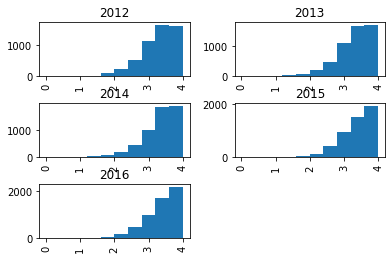

In [171]:
stdnt_term['gpa_avg'].hist(by=stdnt_term['year'])

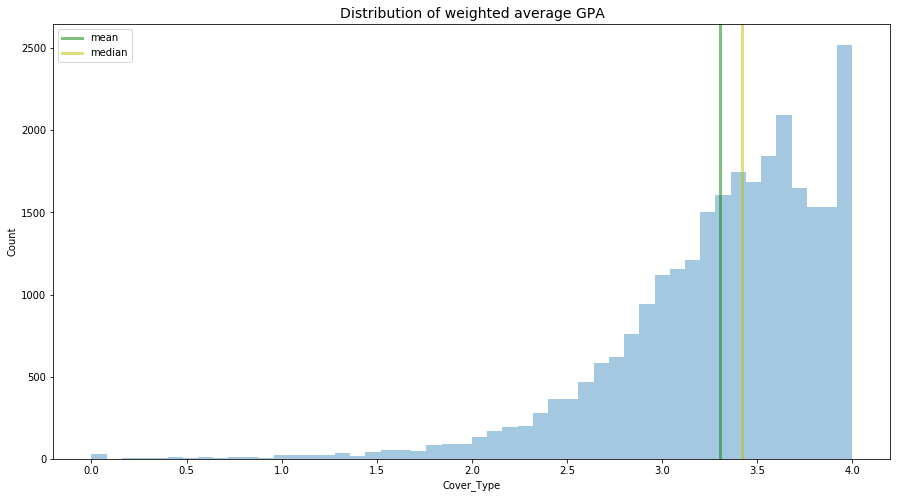

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the plot size
plt.figure(figsize=(15,8))

# set the histogram, mean and median
sns.distplot(stdnt_term['gpa_avg'], kde=False)
plt.axvline(x=stdnt_term['gpa_avg'].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=stdnt_term['gpa_avg'].median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of weighted average GPA", size=14)
plt.legend(["mean", "median"])



In [156]:
stdnt_term['gpa_avg'].describe()

count    26994.000000
mean         3.306595
std          0.551831
min          0.000000
25%          3.023077
50%          3.417157
75%          3.700000
max          4.000000
Name: gpa_avg, dtype: float64

In [194]:
pd.read_csv("/data0/power/LARC_Fairness.csv")['year'].value_counts()

False    10663
Name: retention, dtype: int64